<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

#!pip3 install xgboost
#!pip3 install tables

import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'preferential_followees', 'preferential_followers',
       'num_followers_s', 'num_followers_d', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_u_dot', 'svd_v_dot'],
      dtype='object

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9227658798395081 test Score 0.9156242129124338
Estimators =  50 Train Score 0.9185342627032996 test Score 0.8904094942799101
Estimators =  100 Train Score 0.9200447039408404 test Score 0.8880037891836031
Estimators =  250 Train Score 0.9201724083949948 test Score 0.9008380482409495
Estimators =  450 Train Score 0.9204670171734383 test Score 0.9115468225660075


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

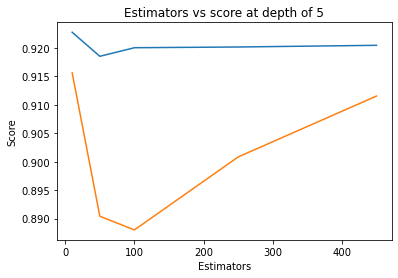

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9036848427601926 test Score 0.8848022351493923
depth =  9 Train Score 0.9574289458596119 test Score 0.9204087690285375
depth =  11 Train Score 0.9612406264347293 test Score 0.9216205341070333
depth =  15 Train Score 0.9642700681588948 test Score 0.9222226931717035
depth =  20 Train Score 0.9649094173331157 test Score 0.9227439580725243
depth =  35 Train Score 0.9650352504259638 test Score 0.9227145403615993
depth =  50 Train Score 0.9650352504259638 test Score 0.9227145403615993
depth =  70 Train Score 0.9650352504259638 test Score 0.9227145403615993
depth =  130 Train Score 0.9650352504259638 test Score 0.9227145403615993


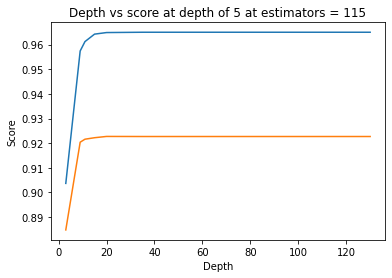

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist, \
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score = True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96303978 0.96250023 0.96049968 0.96220218 0.96385195]
mean train scores [0.96415281 0.96361507 0.96114294 0.96340749 0.9655469 ]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9665059113200253
Test f1 score 0.9233699447654118


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


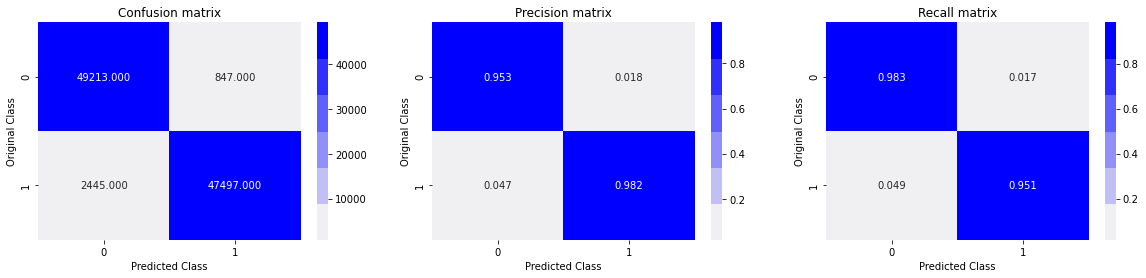

Test confusion_matrix


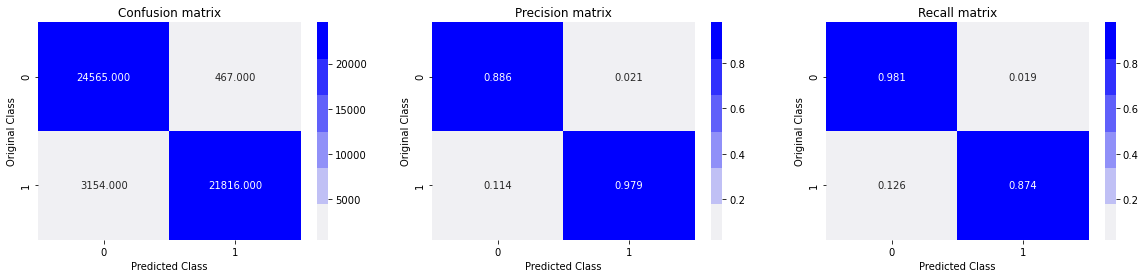

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

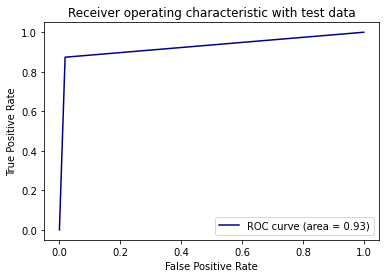

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

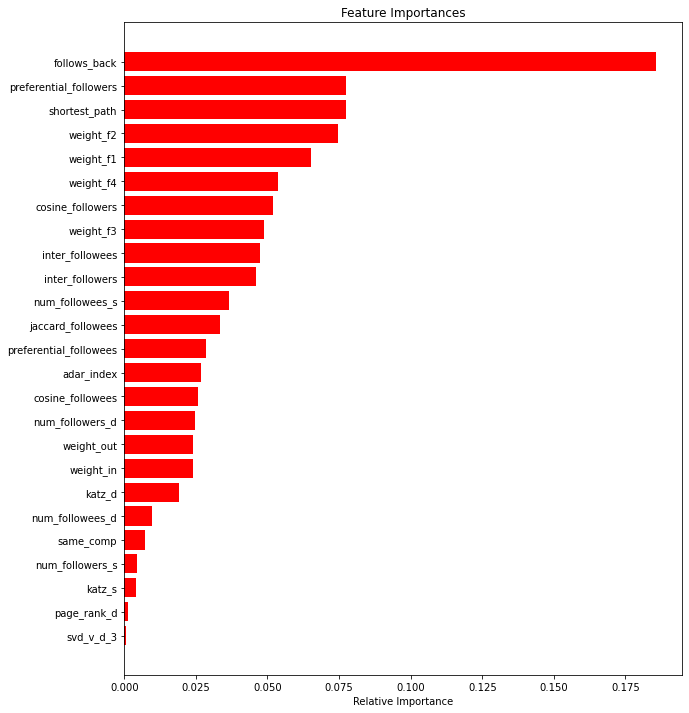

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
def xgb_f1(y, t, threshold=0.5):
    t = t.get_label()
    y_bin = [1. if y_cont > threshold else 0. for y_cont in y]
    return 'f1',f1_score(t,y_bin)

def f1score(y_pred, y_true, threshold=0.5):
    y_bin = [1 if y_cont > threshold else 0 for y_cont in y_pred]
    return f1_score(y_true, y_bin)


def modelfit(alg, dtrain, label, useTrainCV = True, cv_folds=3, early_stopping_rounds=50):
    
    if useTrainCV:
        
        skfold = StratifiedKFold(n_splits = cv_folds)
        nfolds = [x for x in skfold.split(dtrain, label)]

        xgb_param = alg.get_xgb_params()

        xgtrain = xgb.DMatrix(dtrain.values, label=label)

        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], stratified = True, \
                          nfold=cv_folds, folds = nfolds, \
                          verbose_eval = True, show_stdv = True, feval = xgb_f1, maximize = True, \
                          early_stopping_rounds = early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(f'Optimal Estimators : {cvresult.shape[0]}')
    
    #Fit the algorithm on the data
    alg.fit(dtrain.values, label, eval_metric = xgb_f1)
        
    #Predict training set:
    dtrain_predictions = alg.predict_proba(dtrain.values)[:,1]
    #print(dtrain_predictions.shape, dtrain_predictions[2])
    #Print model report:
    print("\nModel Report")
    print("Training F1 : %.4g" % f1score(dtrain_predictions, label))
    print("AUC Score (Train): %f" % roc_auc_score(label, dtrain_predictions))
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [ ]:
x_model = xgb.XGBClassifier( 
          
          verbosity = 0,
          learning_rate = 0.5,
          n_estimators = 200,
          max_depth=3,
          min_child_weight=1,
          gamma=1,
          subsample=0.5, 
          colsample_bytree=1
          
                           )

import time
start_time = time.time()

modelfit(x_model, dtrain = df_final_train, label =  y_train, useTrainCV = False, early_stopping_rounds = 20)

print("--- %s seconds ---" % (time.time() - start_time))



Model Report
Training F1 : 0.9913
AUC Score (Train): 0.999725
--- 16.33833885192871 seconds ---


In [ ]:
x_model.fit(df_final_train, y_train)
y_test_pred = x_model.predict_proba(df_final_test)[:,1]

print(f1score(y_test_pred, y_test))

0.8832272697245283


In [ ]:
def tradeoff_plot2D(param_first, param_second, mean_test_score, mean_train_score, xlabel = "Parameter second", ylabel = "Parameter first"):

    ValScoreMat =  np.asarray(mean_test_score).reshape(len(param_first), len(param_second));
    TrainScoreMat = np.asarray(mean_train_score).reshape(len(param_first), len(param_second));

    DValScore = pd.DataFrame(ValScoreMat, columns = param_second, index = param_first)
    DTrainScore = pd.DataFrame(TrainScoreMat, columns = param_second, index = param_first)

    plt.rcParams['figure.figsize'] = [20, 10]  

    fig=plt.figure(figsize=(18, 16), dpi= 250)
    fig, (ax1, ax2) =plt.subplots(1,2)

    sns.heatmap(DValScore, cmap = "YlGnBu", linewidths=0.0025, cbar = False, annot = True, ax=ax1, fmt='.3f' )
    sns.heatmap(DTrainScore, cmap = "YlGnBu", linewidths=0.0025, cbar = False, annot = True, ax=ax2, fmt='.3f')

    ax1.set_title('Validation plot')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)


    ax2.set_title('Training plot')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)


    fig.show()

## Searching for optimal Depth and min_child weight via Grid Search - 

<Figure size 4500x4000 with 0 Axes>

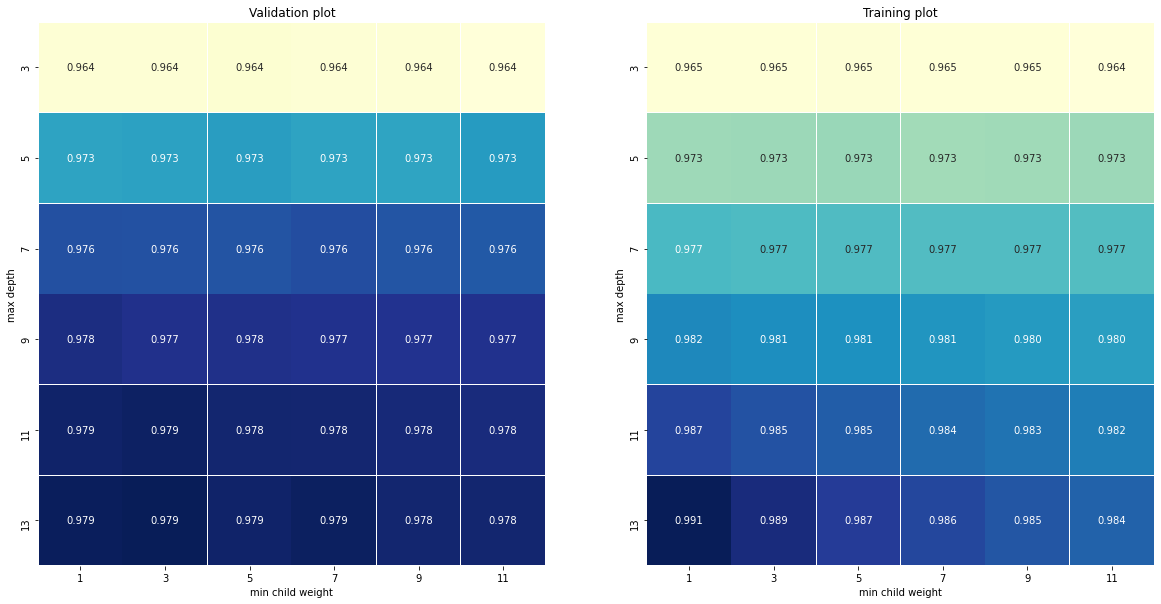

In [ ]:
param_test1 = {
                'max_depth':range(3,15,2),
                'min_child_weight':range(1,13,2)
              }

f1_scorer = make_scorer(f1score, greater_is_better = True)

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( 
          
                                    verbosity = 0,
                                    learning_rate =0.1,
                                    n_estimators=50,
                                    gamma=1,
                                    subsample=0.6, 
                                    colsample_bytree=0.6
                                                
                                                     ),

                        param_grid = param_test1, 
                        scoring = f1_scorer, 
                        n_jobs = -1, 
                        cv = 3,
                        return_train_score=True,
                        )

gsearch1.fit(df_final_train, y_train)

%matplotlib inline

max_depth = [x for x in range(3,15,2)]
min_child_weight = [x for x in range(1,13,2)]

TrainScore = list(gsearch1.cv_results_['mean_train_score'])
TestScore = list(gsearch1.cv_results_['mean_test_score'])

tradeoff_plot2D(max_depth, min_child_weight, TestScore, TrainScore, xlabel = "min child weight", ylabel = "max depth")

In [ ]:
print('Best parameters from search - \n',gsearch1.best_params_)

Best parameters from search - 
 {'max_depth': 13, 'min_child_weight': 3}


## Searching for Optimal Gamma, also recalibrating optimal boosting rounds for Learning rate of 0.1 - 

In [ ]:
def tradeoff_plot1D(params, TestScore, TrainScore, ax = None, xlabel = "Parameter", ylabel = "Score", plt_test = {}, plt_train = {}) :

  
    """

    params : Parameters of GridSearchCV or RandomSearchCV, can be obtained from .cv_results_['name of parameter'] attribute
  
    TestScore : "y" values for test plot, obtain using .cv_results_['mean_test_score'] 
              attribute of GrdiSearchCV or RandomSearchCV object 
  
    TrainScore : "y" values for train plot, obtain using cv_results_['mean_train_score'] 
              attribute of GrdiSearchCV or RandomSearchCV object 
  
    **plt_test : create a dictionary with keys as argument names and their respective values as items for train plot
  
    **plt_train : create a dictionary with keys as argument names and their respective values as items for train plot

    ax : can assign axes if None then automatically takes current axes
    
    """

    if "color" not in plt_train.keys():
      plt_train['color'] = "green"

    if "marker" not in plt_train.keys():
        plt_train['marker'] = "o"

    if "color" not in plt_test.keys():
      plt_test['color'] = "red"

    if "marker" not in plt_test.keys():
        plt_test['marker'] = "o"


    plt.plot(params, TestScore, label = "Performance on Validation Data", **plt_test)
    plt.plot(params, TrainScore, label = "Performance on Training Data", **plt_train)
    plt.legend()
    plt.xticks(params, rotation = -45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Train vs Val. Performance")

    if ax == None : 
        ax = plt.gca()
        ax.set_xscale('log')
        fig = plt.gcf()
        fig.set_size_inches(11,8)


Best Params -- {'gamma': 1}


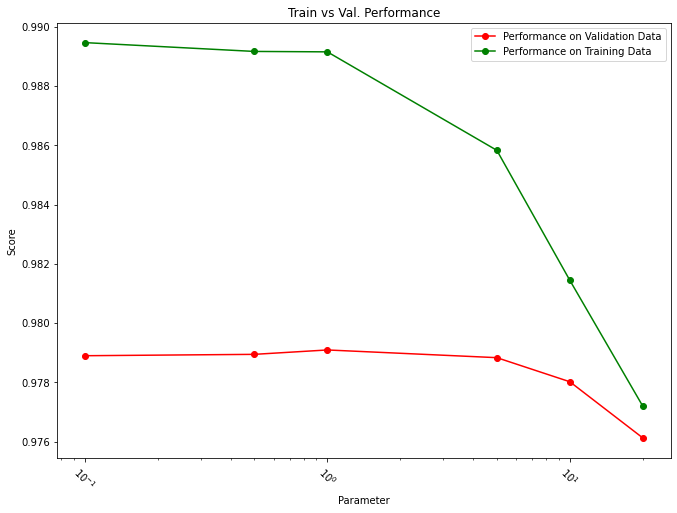

In [ ]:
param_test2 = {
                'gamma':[0.1, 0.5, 1, 5, 10, 20]
              }

f1_scorer = make_scorer(f1score, greater_is_better = True)

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( 
          
                                    verbosity = 0,
                                    learning_rate =0.1,
                                    n_estimators=50,
                                    max_depth=13,
                                    min_child_weight=3,
                                    subsample=0.6, 
                                    colsample_bytree=0.6
                                                
                                                    ),

                        param_grid = param_test2, 
                        scoring = f1_scorer, 
                        n_jobs = -1, 
                        cv = 3,
                        return_train_score=True
                       )

gsearch1.fit(df_final_train, y_train)

TrainScore = list(gsearch1.cv_results_['mean_train_score'])
TestScore = list(gsearch1.cv_results_['mean_test_score'])

tradeoff_plot1D(params = gsearch1.cv_results_["param_gamma"], 
                TestScore = TestScore, 
                TrainScore = TrainScore)

print("Best Params --", gsearch1.best_params_ )

**Recalibrating number of estimators** -  

In [ ]:
x_model = xgb.XGBClassifier( 
          
          verbosity = 0,
          learning_rate = 0.1,
          n_estimators = 1000,
          max_depth = 13,
          min_child_weight = 3,
          gamma=1,
          subsample=0.6, 
          colsample_bytree=0.6,

          )

modelfit(x_model, dtrain = df_final_train, label =  y_train, useTrainCV = True, early_stopping_rounds = 5)

[0]	train-logloss:0.60593+0.00014	train-f1:0.00000+0.00000	test-logloss:0.60661+0.00021	test-f1:0.00000+0.00000
[1]	train-logloss:0.53666+0.00143	train-f1:0.00000+0.00000	test-logloss:0.53804+0.00118	test-f1:0.00000+0.00000
[2]	train-logloss:0.47844+0.00095	train-f1:0.92746+0.00417	test-logloss:0.48075+0.00088	test-f1:0.92601+0.00381
[3]	train-logloss:0.42894+0.00120	train-f1:0.94364+0.00458	test-logloss:0.43214+0.00094	test-f1:0.93875+0.00599
[4]	train-logloss:0.38826+0.00305	train-f1:0.95444+0.00752	test-logloss:0.39217+0.00298	test-f1:0.94938+0.00994
[5]	train-logloss:0.35302+0.00174	train-f1:0.95808+0.00632	test-logloss:0.35758+0.00172	test-f1:0.95234+0.00802
[6]	train-logloss:0.31949+0.00182	train-f1:0.96476+0.00425	test-logloss:0.32462+0.00179	test-f1:0.95924+0.00598
[7]	train-logloss:0.29013+0.00168	train-f1:0.96974+0.00167	test-logloss:0.29576+0.00157	test-f1:0.96491+0.00291
[8]	train-logloss:0.26386+0.00099	train-f1:0.97301+0.00088	test-logloss:0.26997+0.00086	test-f1:0.96894+

## Searching for Optimal Value of Subsample & Colsample by tree -

Best Params --  {'colsample_bytree': 0.9, 'subsample': 0.7}


<Figure size 4500x4000 with 0 Axes>

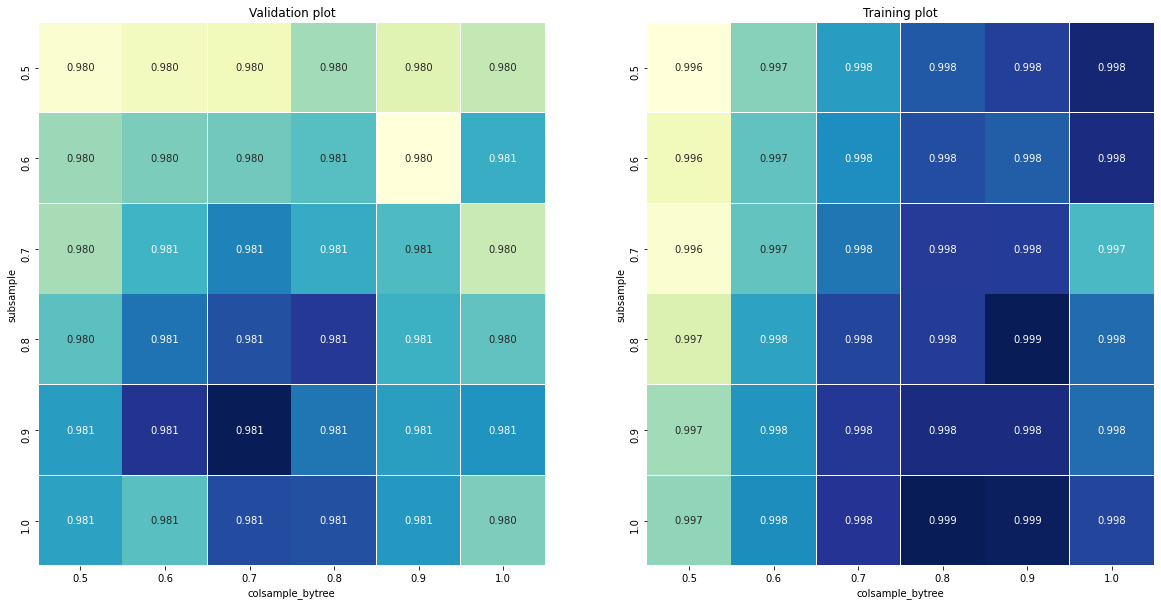

In [ ]:
param_test3 = {
                'subsample' : [x/20 for x in range(10,22,2)],
                'colsample_bytree' : [x/20 for x in range(10,22,2)]
              }

f1_scorer = make_scorer(f1score, greater_is_better = True)

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( 
          
                                    verbosity = 0,
                                    learning_rate =0.1,
                                    n_estimators=103,
                                    max_depth=13,
                                    min_child_weight=3,
                                    gamma=1
                                                ),

                        param_grid = param_test3, 
                        scoring = f1_scorer, 
                        n_jobs = -1, 
                        cv = 3,
                        return_train_score=True
                        )

gsearch1.fit(df_final_train, y_train)

%matplotlib inline

subsample = [x/20 for x in range(10,22,2)]
colsample_bytree = [x/20 for x in range(10,22,2)]
TrainScore = list(gsearch1.cv_results_['mean_train_score'])
TestScore = list(gsearch1.cv_results_['mean_test_score'])

tradeoff_plot2D(subsample, colsample_bytree, TestScore, TrainScore, xlabel = "colsample_bytree", ylabel = "subsample")

print("Best Params -- \n", gsearch1.best_params_)

## Searching for Best Regularization Parameters reg_alpha & reg_lambda- 

Best Params -- 
 {'reg_alpha': 0, 'reg_lambda': 0.1}


<Figure size 4500x4000 with 0 Axes>

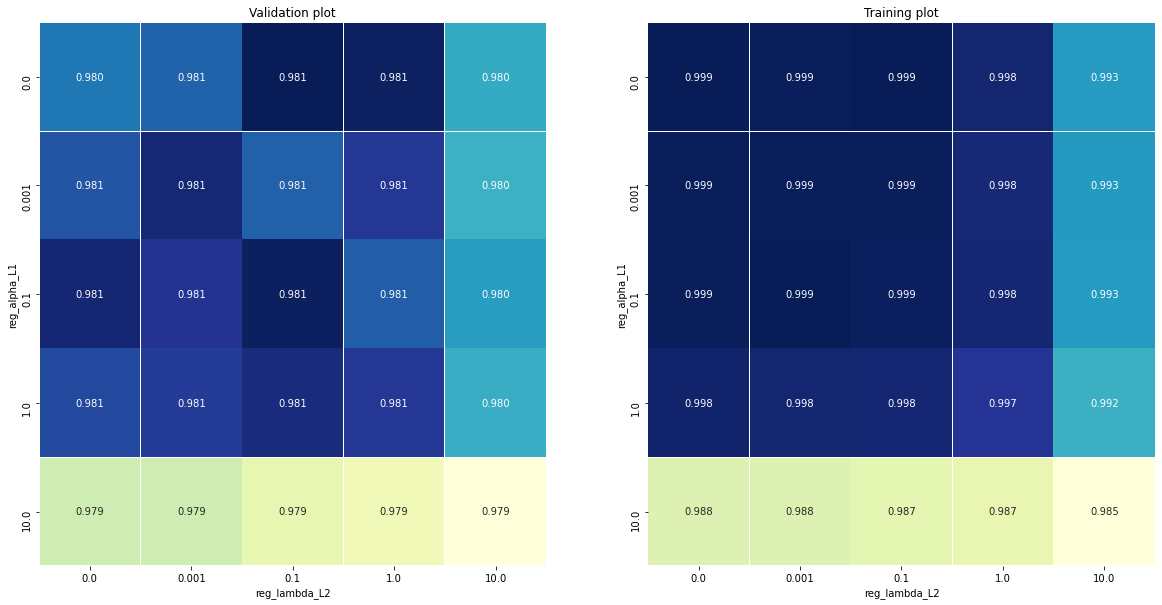

In [ ]:
param_test4 = {
                'reg_alpha' : [0, 0.001, 0.1, 1, 10],
                'reg_lambda' : [0, 0.001, 0.1, 1, 10]
              }

f1_scorer = make_scorer(f1score, greater_is_better = True)

gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( 
          
                                    verbosity = 0,
                                    learning_rate =0.1,
                                    n_estimators=103,
                                    max_depth=13,
                                    min_child_weight=3,
                                    gamma=1,
                                    subsample=0.7, 
                                    colsample_bytree=0.9
                                                     
                                                     ),

                        param_grid = param_test4, 
                        scoring = f1_scorer, 
                        n_jobs = -1, 
                        cv = 3,
                        return_train_score=True
                        )

gsearch1.fit(df_final_train, y_train)

reg_alpha = [0, 0.001, 0.1, 1, 10]
reg_lambda = [0, 0.001, 0.1, 1, 10]
TrainScore = list(gsearch1.cv_results_['mean_train_score'])
TestScore = list(gsearch1.cv_results_['mean_test_score'])

tradeoff_plot2D(reg_alpha, reg_lambda, TestScore, TrainScore, xlabel = "reg_lambda_L2", ylabel = "reg_alpha_L1")

print("Best Params -- \n", gsearch1.best_params_)

## Reducing Learning rate to add more trees - 

In [ ]:
x_model = xgb.XGBClassifier( 
          
          verbosity = 0,
          learning_rate = 0.05,
          n_estimators = 1000,
          max_depth = 13,
          min_child_weight = 3,
          gamma=1,
          subsample=0.7, 
          colsample_bytree=0.9,
          reg_alpha = 0,
          reg_lambda = 0.1
                            )

modelfit(x_model, dtrain = df_final_train, label = y_train, useTrainCV = True, early_stopping_rounds = 10)

[0]	train-logloss:0.64764+0.00004	train-f1:0.00000+0.00000	test-logloss:0.64828+0.00004	test-f1:0.00000+0.00000
[1]	train-logloss:0.60681+0.00038	train-f1:0.00000+0.00000	test-logloss:0.60801+0.00028	test-f1:0.00000+0.00000
[2]	train-logloss:0.56925+0.00038	train-f1:0.00000+0.00000	test-logloss:0.57094+0.00020	test-f1:0.00000+0.00000
[3]	train-logloss:0.53557+0.00075	train-f1:0.00000+0.00000	test-logloss:0.53771+0.00071	test-f1:0.00000+0.00000
[4]	train-logloss:0.50458+0.00121	train-f1:0.00000+0.00000	test-logloss:0.50720+0.00125	test-f1:0.00000+0.00000
[5]	train-logloss:0.47610+0.00111	train-f1:0.92880+0.01975	test-logloss:0.47930+0.00092	test-f1:0.92544+0.02011
[6]	train-logloss:0.44925+0.00097	train-f1:0.95688+0.00570	test-logloss:0.45297+0.00081	test-f1:0.95221+0.00758
[7]	train-logloss:0.42460+0.00100	train-f1:0.96748+0.00061	test-logloss:0.42878+0.00077	test-f1:0.96442+0.00136
[8]	train-logloss:0.40158+0.00090	train-f1:0.97036+0.00040	test-logloss:0.40625+0.00068	test-f1:0.96683+

## **Final Model Evalution by calculating F1 Score on Test Set** 

In [ ]:
x_model = xgb.XGBClassifier( 
          
          verbosity = 0,
          learning_rate = 0.05,
          n_estimators = 244,
          max_depth = 13,
          min_child_weight = 3,
          gamma=1,
          subsample=0.7, 
          colsample_bytree=0.9,
          reg_alpha = 0,
          reg_lambda = 0.1
                            )

x_model.fit(df_final_train, y_train)
y_pred_test = x_model.predict_proba(df_final_test)[:,1]
y_pred_train = x_model.predict_proba(df_final_train)[:,1]

Train F1, AUC :  0.9993 & 1.0000 resp.
Test F1, AUC :  0.9239 & 0.9466 resp.
--------------------------------------------------
Train confusion_matrix


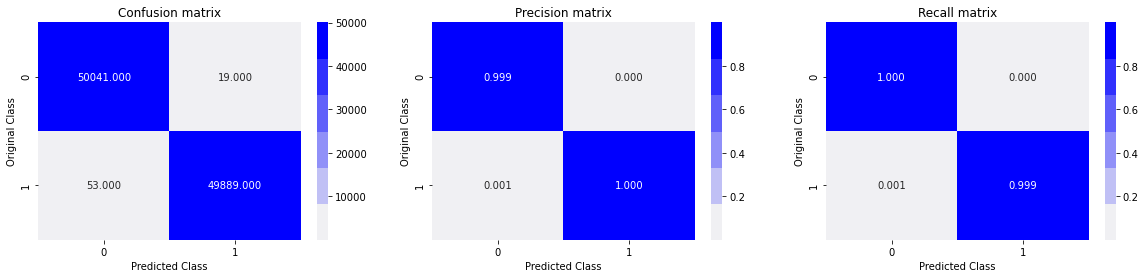

Test confusion_matrix


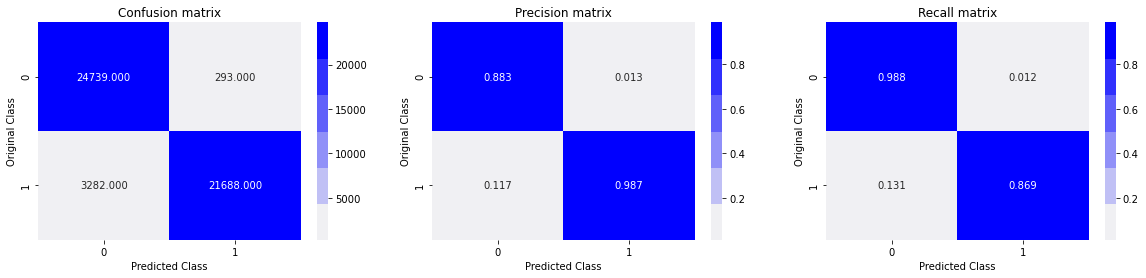

In [ ]:
print(f"Train F1, AUC : {f1score(y_pred_train, y_train): .4f} & {roc_auc_score(y_train, y_pred_train):.4f} resp.")
print(f"Test F1, AUC : {f1score(y_pred_test, y_test): .4f} & {roc_auc_score(y_test, y_pred_test):.4f} resp.")

print('--'*25)

print('Train confusion_matrix')
plot_confusion_matrix(y_train,[1 if y_cont > 0.5 else 0 for y_cont in y_pred_train])
print('Test confusion_matrix')
plot_confusion_matrix(y_test,[1 if y_cont > 0.5 else 0 for y_cont in y_pred_test])

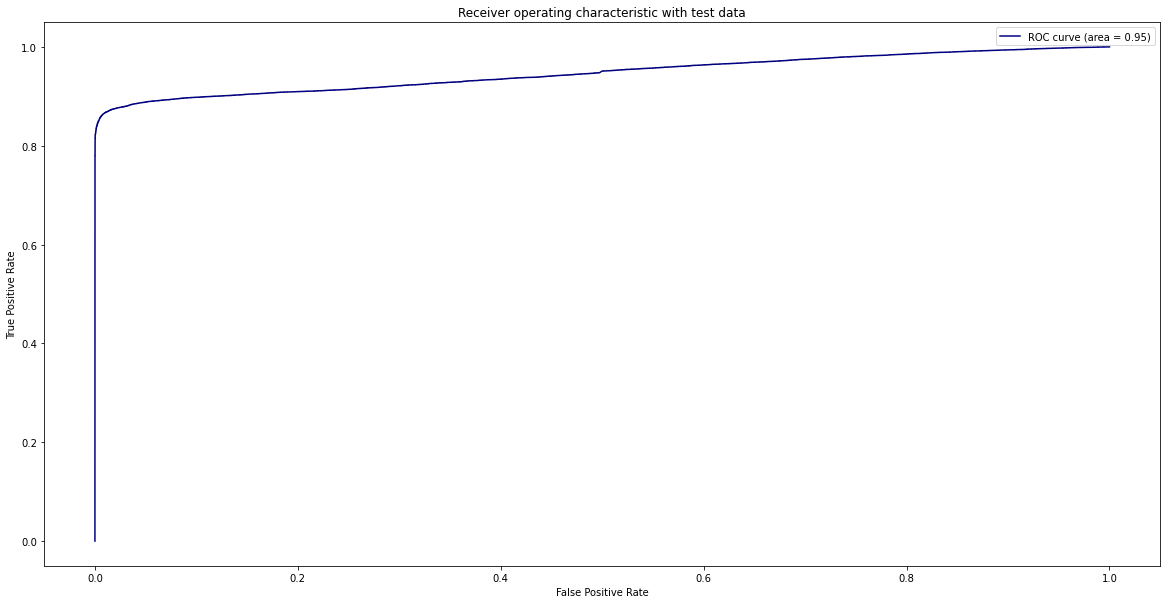

In [ ]:
fpr,tpr,ths = roc_curve(y_test,y_pred_test)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

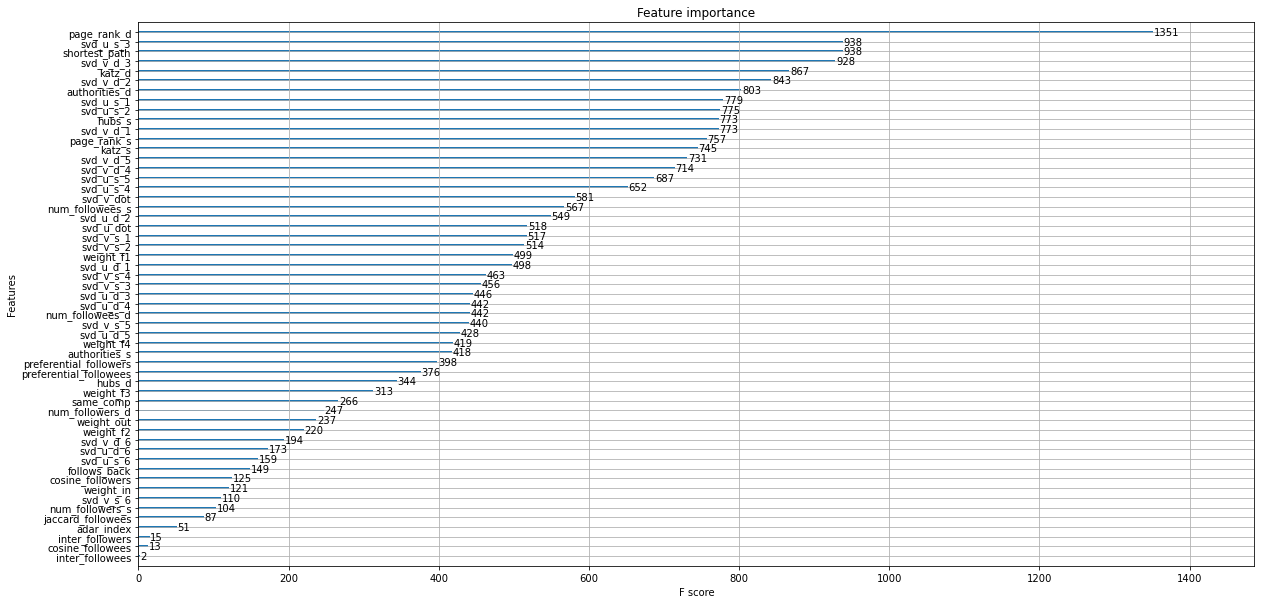

In [ ]:
from xgboost import plot_importance
plot_importance(x_model)

Results Summary - 

1. XGBoost Model has certainly improved the f1 score & AUROC on test set although not by much, i.e. 0.9239, 0.95 in comparison to 0.9233, 0.93 of Random Forest Model. 

2. Also results highlight improved Precision on '1' i.e. 98.7%(RF Model : 97.9%) & recall on '0' 98.8%(RF Model : 98.1%) 

3. Both Prefrential & svd_dot features has added values to the model, although svd_u_dot & svd_v_dot added more value when compared to prefrential features. 